# ESS330 Final Project

Mel Balcarcel Arias (Colorado State University)  
Sean Walsh (Colorado State University)

# Title: Low Air Quality, COVID Severity, and Their Effects on Asthma

# Introduction, Background, and Motivation

Air pollution has long been a contributor to respiratory illnesses. There are many factors that go into the quality of air but some stick out more than others. PM2.5 refers to fine particles of pollution and they have been confirmed to lead to heart disease, asthma, and other pulmonary issues ([Health, 2024](#ref-DepartmentofHealth_2024)). Air pollution is an especially concerning form of pollution because it’s one that people may not be fully aware that they’re exposed to. However, its consequences can be very severe, and in the long run could be considered a silent killer. Over multiple studies, information has been discovered of its effects on human health ranging from multiple conditions ([Malik et al., 2024](#ref-malik2024)). PM2.5 isn’t the only thing to be concerned about though, there are many other particulates that are of concern and should be on everyone’s radar. From ozone to nitrogen dioxide, the presence of these pollutants can greatly impact vulnerable populations such as children and the elderly. Continued monitoring and stricter regulations may be essential to reducing long-term exposure and protecting public health ([Monoson et al., 2023](#ref-monoson2023air)).

In addition, the world saw another detrimental contributor to reduced pulmonary health: COVID-19. Some studies suggested worsening asthma and worse covid symptoms when exposed to both ([Agondi et al., 2022](#ref-agondi2022worsening)). This indicates that people in areas of high pollution and asthma likely had a very difficult time during the initial outbreak of covid and the years that came after it. While a pandemic will be impossible to predict in the future, reduction in air pollution is a lot more feasible. By examining the severity of asthma, we can hopefully have more preventative measures in case other extreme instances of diseases that affect pulmonary health spring up. This way, if another event like covid happens, more extensive measures could be taken to help out its more vulnerable residents. It also highlights the importance of creating healthier urban environments that reduce exposure risks in the first place. Investing in cleaner technologies and infrastructure now could make a significant difference in how societies handle future health crises.

We were able to pull 4 sets of data. The first that we found was the most recent data of asthma prevalence and mortality. Unfortunately these datasets only went up to 2021 which limits the scope of this project. However, the CDC provides some great information. It not only provides the total number of people with asthma but it also gives us a percentage by state which is very useful for nationwide analysis. In addition they also provide mortality rates, and looking at the data, while the numbers are (thankfully) not very large, it could still provide valuable insights. Since this data only goes up to 2021, air quality data from the EPA was pulled to match this window of time. The EPA keeps records of carbon monoxide, nitrogen dioxide, ozone, sulfur dioxide, PM2.5, PM10 and lead as measures of air quality. They also include a key to show when levels are above the standard. There appear to be a good amount of missing data points but thankfully the data seems robust enough to use. Finally, we included a dataset of total covid cases by county, but state data would likely be more useful and manageable. By having this information, we can see what states were hit the hardest and had the most cases.

There are multiple avenues for methodology with the data that we have. First and foremost, we could consolidate our air quality data to examine each pollutant and get a total count of how many counties exceed the acceptable level. Once we have these amounts we can rank states by how many counties they have that exceed certain pollutants. After this we can rank them and see which are the worst. In addition, for our covid data, we can consolidate our data into state counts to see which states were hit the hardest with cases. While our worst polluted states and states with most covid cases may not line up, it will be interesting to see if there are states where both are prevalent. Once we have states with the most extreme parameters, we could cross-reference it with the number of asthma cases and mortality rates. While the work may have to be extensive, we could also go deeper and look at each pollutant in the air quality data and reference it with the rest of our data. If we are able to find a correlation between these environmental factors and asthma, we could also implement some machine learning for further analysis. We can look at how pollutants and their levels could predict asthma and possibly other pulmonary issues. Predicting data like this could be very useful when it comes to providing motivation to keep pollution levels low. When the human impact could be easily quantifiable, it could become easier to convince stakeholders.

# Data Exploration

In [ ]:
EPA_air_quality <- read.csv("conreport2021.csv")
asthma_prevalence <- read.csv("CDC_asthma_2021.csv")
asthma_mort <- read.csv("CDC_asthma_mort2021.csv")
covid_data3 <- read.csv("covid_confirmed_usafacts.csv")
covid_county <- read.csv("us-counties-2021.csv")
combined_data <- read.csv("combined_data.csv")

## EPA Air Quality Data 2021

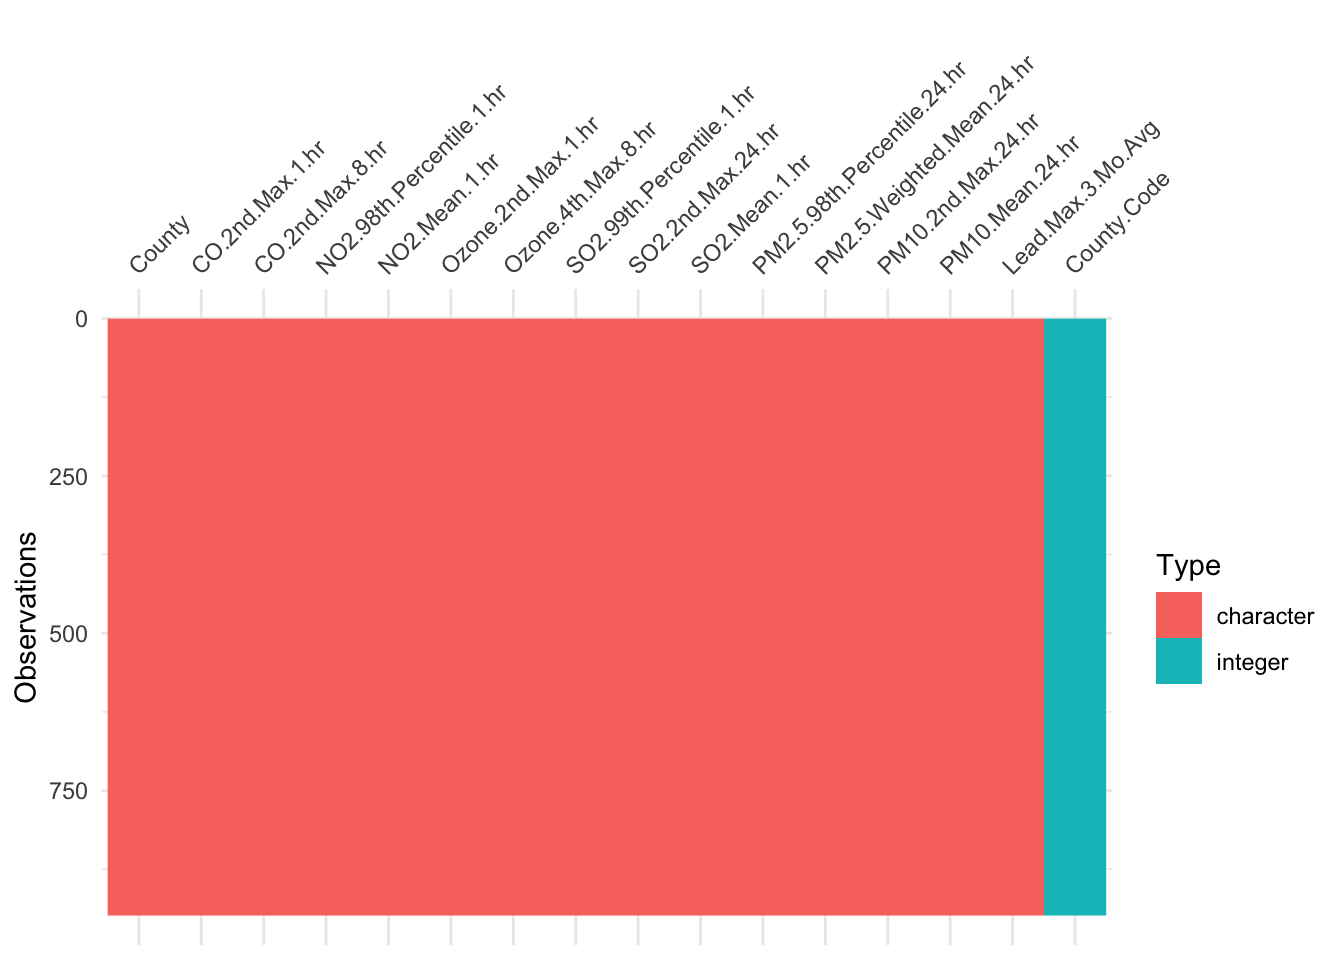

In [ ]:
visdat::vis_dat(EPA_air_quality)

-   This dataset comes from the EPA and it shows air quality in 2021. Out of the many variables, we may only focus on a few, with a big focus on PM2.5 which can be detrimental to human health. There are a good amount of blank entries that we’ll have to account for.

## Asthma Prevalence 2021

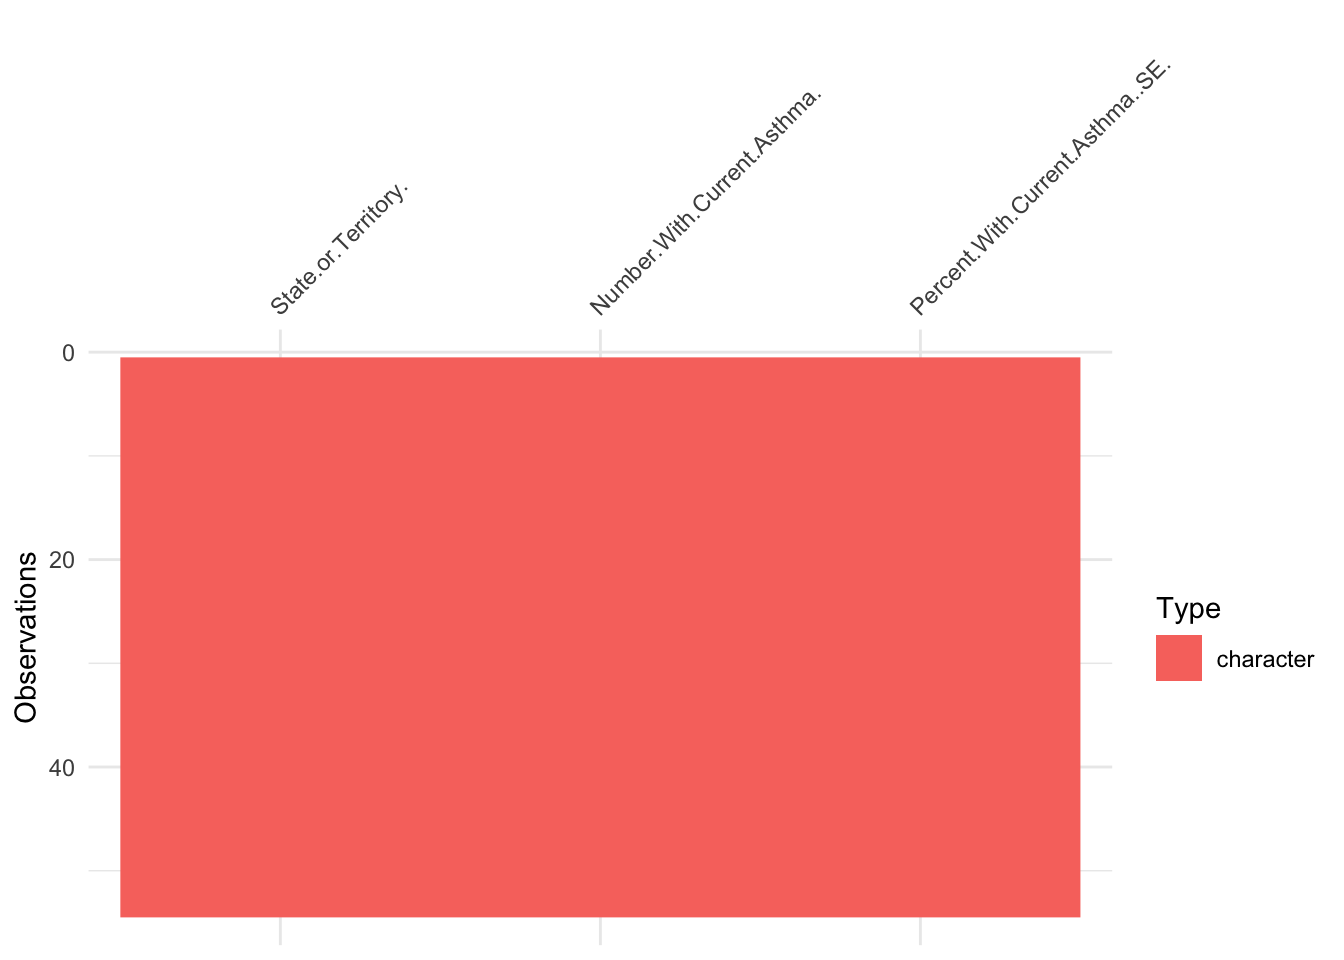

In [ ]:
visdat::vis_dat(asthma_prevalence)

-   This is asthma prevalence on a state by state level in 2021 pulled from the CDC, the data set is pretty complete with a few NA’s.

## Asthma Mortality 2021

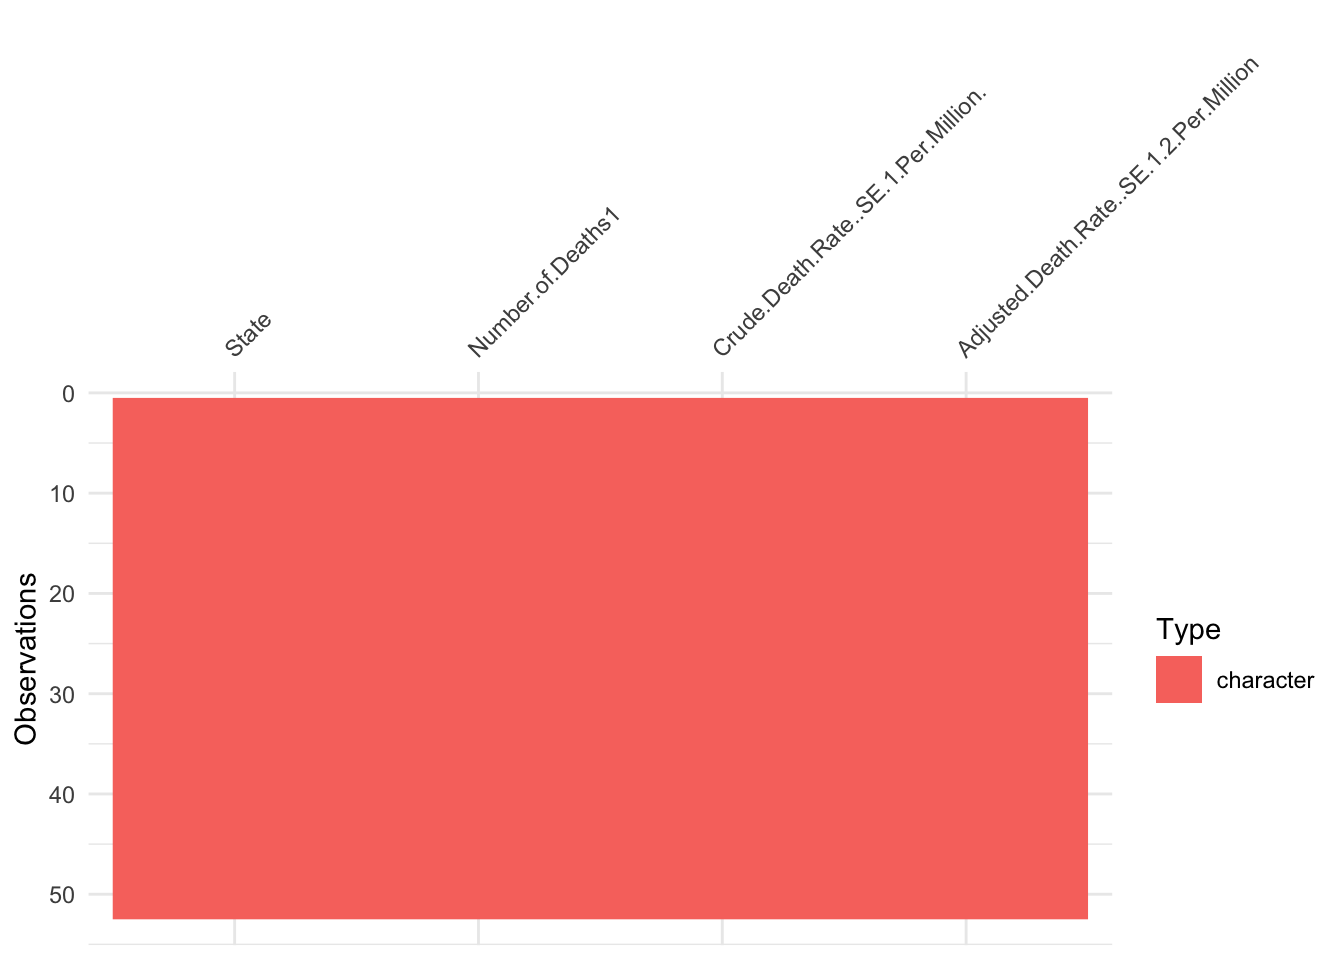

In [ ]:
visdat::vis_dat(asthma_mort)

-   This is the asthma mortality rate on a state by state level in 2021, also pulled from the CDC.

## Covid Cases

In [ ]:
dplyr::slice_sample(covid_county)

        date  county   state  fips cases deaths
1 2021-12-31 Baldwin Georgia 13009  7127    203

-   For the covid side we decided to go with case count and while this data set covers a large period of time, we will only focus on 2021. Since the data set is large we will condense it down into state totals.

# Methods Identification

-   From our data, we feel like we have a lot of air quality parameters to work with which can be very useful as we can explore multiple factors at once. We may already have all the data that we need, but there’s a chance that could look at other respiratory illnesses in addition to asthma.

-   A big challenge is the covid data because it’s just so robust. However, with a lot of cleaning, it could work out. In addition, understanding some of the air quality indices may be challenging but if we focus on 1 or 2, it should be no big issue.

-   Another challenge could just be that the data doesn’t go our way when we apply our methods. In that case, we could bring in separate previously mentioned respiratory illness data that could be used.

-   Our methods could lead us to find a correlation between environmental factors like air quality and covid to see its effect on asthma (and possible other respiratory illnesses) because we will be directly comparing them.

# Methods

# Correlation Matrix

After the combination of data with State as our common parameters across all of them, we were able to get a dataset that included total PM2.5 means in states, total asthma cases in states, and total covid cases in states for 2021. This combination of the data allows us to run a correlation matrix in order to assess possible correlation.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

            pm25    asthma     covid
pm25   1.0000000 0.8499841 0.8321378
asthma 0.8499841 1.0000000 0.9846430
covid  0.8321378 0.9846430 1.0000000

This correlation matrix tells us a lot. There is a high positive correlation between PM2.5 asthma and Covid which makes sense because it’s well known that PM2.5 is particularly harmful to the lungs. However, asthma and covid rates have the absolute highest correlation rates with a score really close 1.0. Given that Covid was a very severe respiratory illness, it’s no surprise that people with asthma were in higher danger. However with that added danger of pollution, these cases could have been made worse. This high correlation will allow us to easily visualize our data as well as use predictive models to see how surges in covid cases or spikes in pollution can affect the rest.

# Graphing and Visualization

## Fig 1.

The graph below shows the top 5 states with the most amount of covid cases.

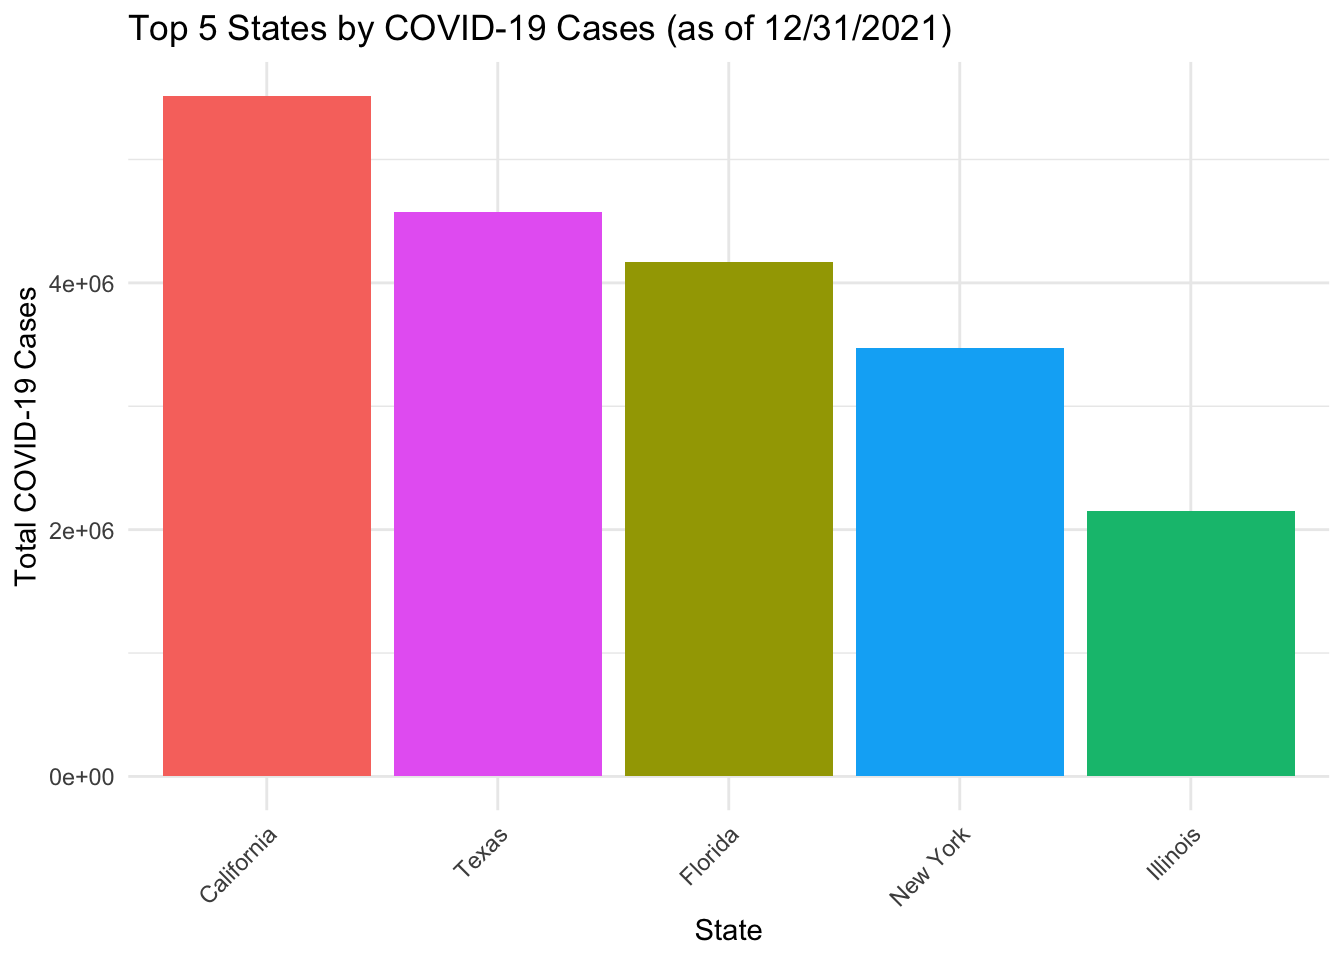

In [ ]:
library(tidyverse)

top5_states <- combined_data %>%
  arrange(desc(total_cases)) %>%
  slice(1:5)

ggplot(top5_states, aes(x = reorder(State, -total_cases), y = total_cases, fill = State)) +
  geom_col(show.legend = FALSE) +
  labs(
    title = "Top 5 States by COVID-19 Cases (as of 12/31/2021)",
    x = "State",
    y = "Total COVID-19 Cases"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Fig 2

The graph below shows how states with a bad air quality will have higher asthma rates.

Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA
Warning in mean.default(X[[i]], ...): argument is not numeric or logical:
returning NA

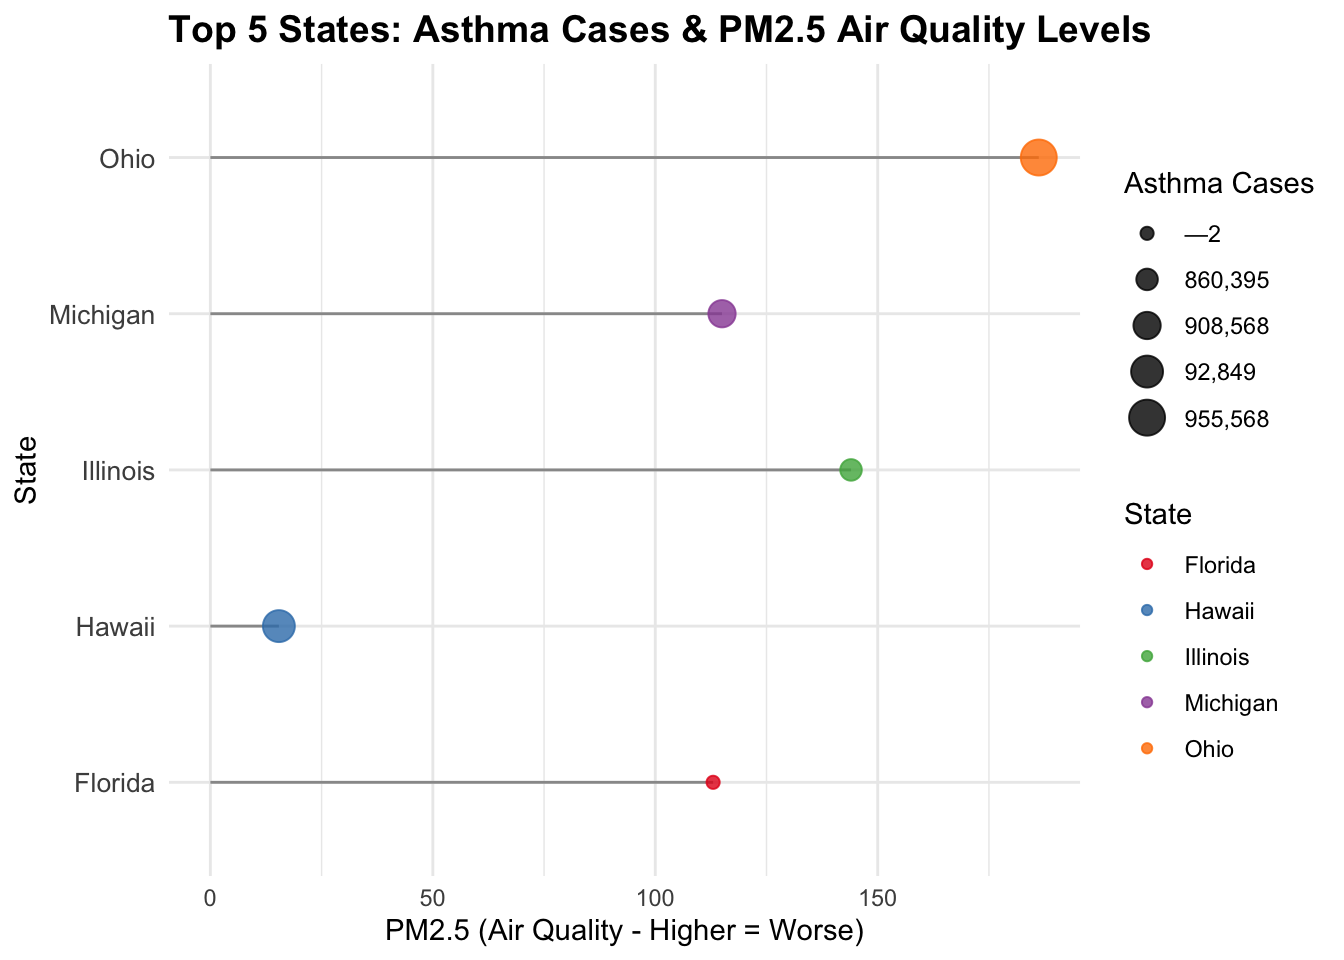

In [ ]:
library(tidyverse)

top5_asthma <- combined_data %>%
  arrange(desc(Number.With.Current.Asthma.)) %>%
  slice(1:5)

ggplot(top5_asthma, aes(x = reorder(State, Number.With.Current.Asthma.))) +
  geom_segment(
    aes(xend = State, y = 0, yend = pm25),
    color = "#999999"
  ) +
  geom_point(aes(y = pm25, size = Number.With.Current.Asthma., color = State), alpha = 0.8) +
  scale_color_brewer(palette = "Set1") +
  coord_flip() +
  labs(
    title = "Top 5 States: Asthma Cases & PM2.5 Air Quality Levels",
    x = "State",
    y = "PM2.5 (Air Quality - Higher = Worse)",
    size = "Asthma Cases",
    color = "State"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 10)
  )

## Fig 3.

The graph below shows how the states with a higher amount of asthma cases are going to have more Covid deaths due to the fact that people with asthma have a lower chance of surviving Covid-19 because it is a respiratory illness.

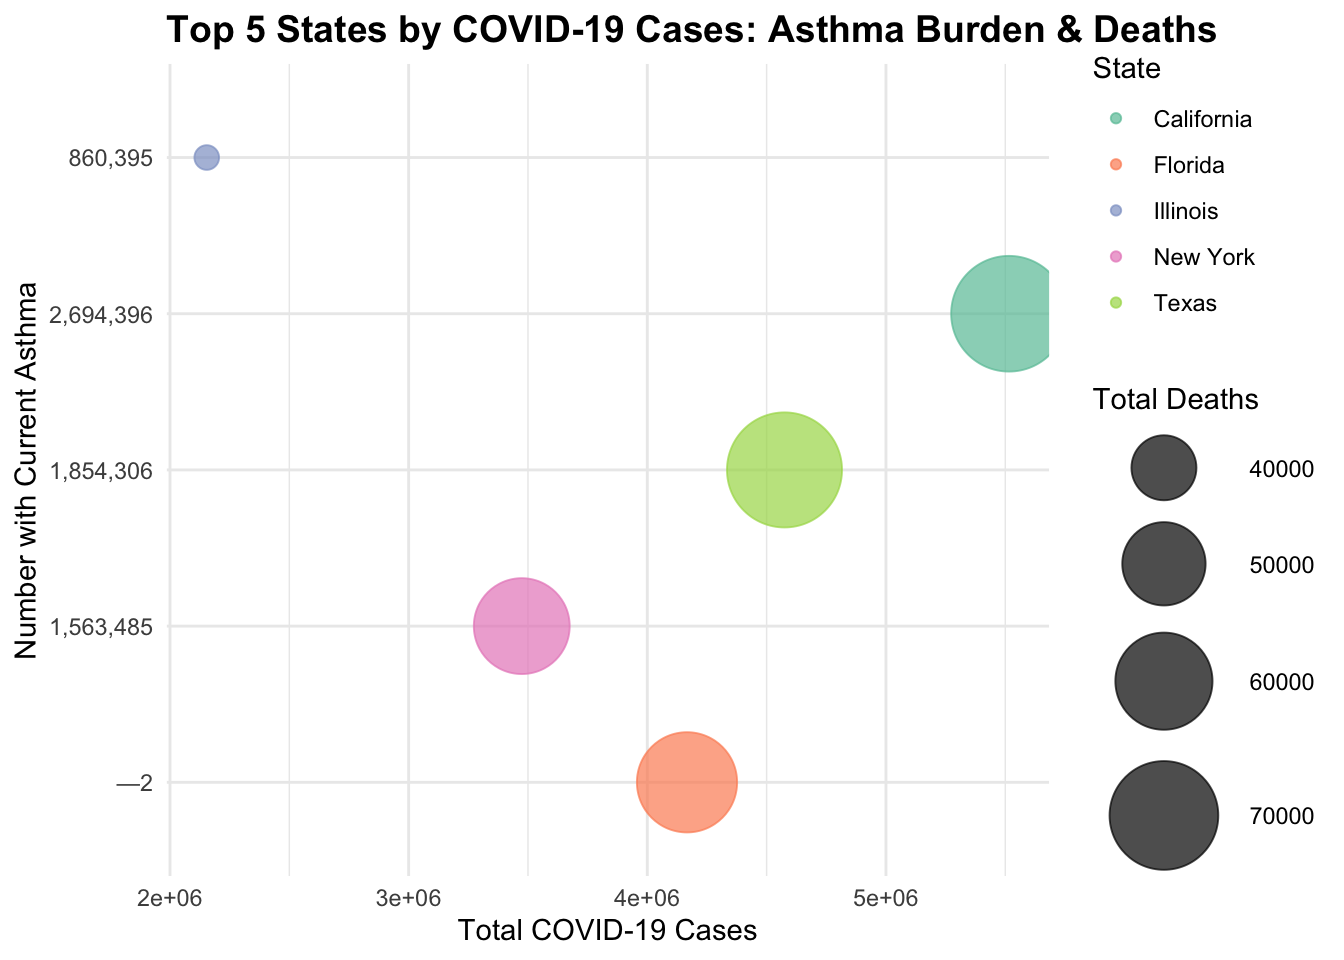

In [ ]:
top5 <- combined_data %>%
  arrange(desc(total_cases)) %>%
  slice(1:5)

ggplot(top5, aes(
  x = total_cases,
  y = Number.With.Current.Asthma.,
  size = total_deaths,
  color = State
)) +
  geom_point(alpha = 0.7) +
  scale_size_continuous(name = "Total Deaths", range = c(4, 20)) +
  scale_color_brewer(palette = "Set2") +
  labs(
    title = "Top 5 States by COVID-19 Cases: Asthma Burden & Deaths",
    x = "Total COVID-19 Cases",
    y = "Number with Current Asthma"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(size = 14, face = "bold")
  )

# Modeling

As a predictive model, we are using a GLM (Generalized Linear Model). This can help us see how our predictors of Covid and PM2.5 affect asthma rates.

In [ ]:
glm_model <- glm(asthma ~ covid + pm25 + covid:pm25, 
                 family = poisson(), 
                 data = combined_data)
summary(glm_model)


Call:
glm(formula = asthma ~ covid + pm25 + covid:pm25, family = poisson(), 
    data = combined_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.173e+01  6.038e-04   19424   <2e-16 ***
covid        6.697e-07  2.537e-10    2640   <2e-16 ***
pm25         6.336e-03  5.659e-06    1120   <2e-16 ***
covid:pm25  -1.421e-09  1.068e-12   -1331   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 18835408  on 48  degrees of freedom
Residual deviance:  2302275  on 45  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 2302992

Number of Fisher Scoring iterations: 4

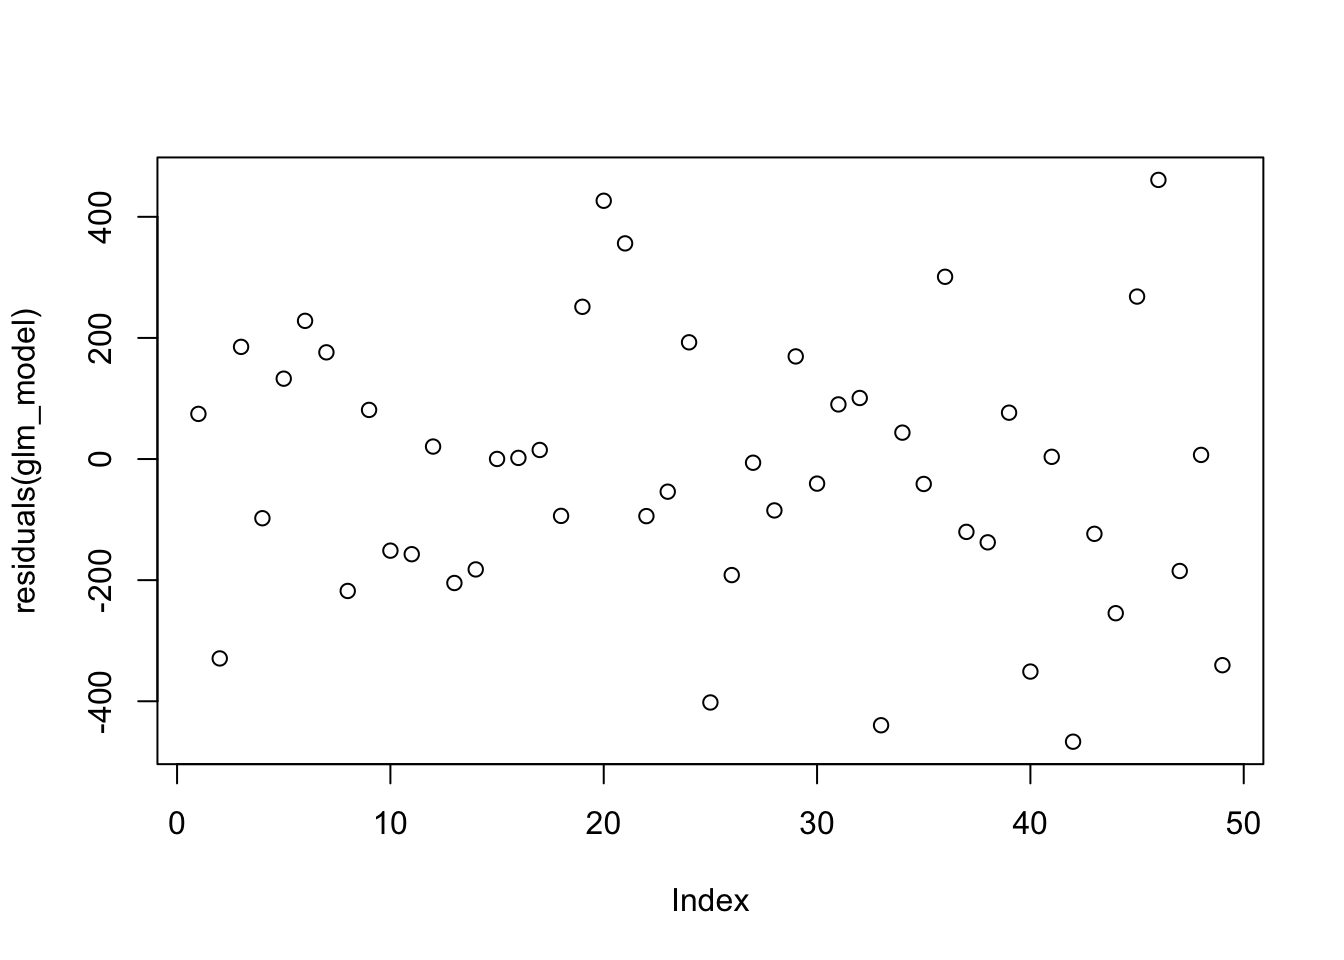

In [ ]:
plot(residuals(glm_model))

For a GLM model, this scattering around the zero is what we want to see. The randomness in a GLM indicates that the model has the information that it needs and it’s not missing anything to make the predictions.

# Results

The correlation matrix gave us an early indicator that there was a strong correlation between 3 of our variables: PM2.5, Covid, and Asthma. A simple way to visualize this was through some graphing comparing the inddivudual parameters on state levels. Because we are going on a state-by-state basis, a time-series analysis would be ideal but that amount of data would be too much to work with, so the modeling was done to see how spikes in Covid cases or spikes in pollution could predict asthma cases. We have data that can show us some of the most impacted states and this was used to predict asthma rates using our GLM. For the model results, the increments by which asthma increased were not massive but they were very statistically significant. Higher covid cases across states did mean that there would be more asthma cases but this wasn’t a big number because covid cases are on a person by person basis, however for the PM2.5, this was an air measurement and every increase in this particulate meant a 0.006336 increase in asthma rates. Through the graphs that we provided you can clearly see that states with a high amount of cases of asthma are going to have higher amount of covid deaths because covid is a respiratory illness and asthma patients are at a higher risk of death.

# Discussion

Our data was very correlative but the numbers weren’t big. However, with the data it’s clear that there is a link between air pollution (particularly PM2.5) and asthma so with something like Covid (or another respiratory illness pandemic) extra concern has to be taken to address areas with high pollution rates because they can be particularly hit hard. A better application of a study like this would be having it applied over a longer period of time in a time-series fashion, but that requires a lot more effort, time, and analysis. In addition, PM2.5 isn’t the only detrimental particulate that can be in our air. The EPA provides extensive research on harmful air pollution so more extensive analysis with that could be useful as well, however, here we are dealing with time and capability constraints. If more research is done like this with certain particulates being magnified though, perhaps more policy can be sought after to reduce their prevalence. While Covid might feel like a concentrated event that was detrimental at the time, we cannot afford to be ill prepared moving on and more consideration has to be taken for the more susceptible residents.

Agondi, R. C., Menechino, N., Marinho, A. K. B. B., Kalil, J., & Giavina-Bianchi, P. (2022). Worsening of asthma control after COVID-19. *Frontiers in Medicine*, *9*, 882665.

Health, D. of. (2024). *Particle Pollution and Health*. <https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm>

Malik, A., Islam, J., Zaib, G., Zahid, A., Rashid, A., & Zia, T. (2024). Interplay of smog and health conditions: A public health perspective on respiratory, hypertensive, and cardiovascular morbidity. *Journal of Physical, Biomedical and Biological Sciences*, *2024*(1), 37–37.

Monoson, A., Schott, E., Ard, K., Kilburg-Basnyat, B., Tighe, R. M., Pannu, S., & Gowdy, K. M. (2023). Air pollution and respiratory infections: The past, present, and future. *Toxicological Sciences*, *192*(1), 3–14.